# Assignment: Linear Regression
In this assignment you will implement Linear Regression for a very simple test case. Please fill into the marked places of the code
  
  (1) the cost function
  (2) the update function for Gradient Descent

Things that need to be updated are marked with "HERE YOU ..."

This assignment is kept very simple on purpose to help you familiarize with Python (Jupyter notebooks) and Linear Regression. Feel free to make some useful tests such as, but not limited to:
- What happens if the learning rate is too high or too low?
- Can Linear Regression really find the absolute global minimum?
- What effect does it have if you change the initial guess for the gradient descent to something completely off?
- What happens if you are not updating thet0 and thet1 "simultaneously" but you are updating both parameters in separate for loops (see below)?
- You can try to turn this code for Linear Regression into an implementation of Logistic Regression

## Import the required packages

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from numpy import dot
from numpy import subtract
from numpy import square
from numpy import mean

## Function to calculate the Gradiend descent

In [145]:
def gradientDescent(x, y, theta, alpha, m, maxsteps):
    # HERE YOU HAVE TO IMPLEMENT THE UPDATE OF THE PARAMETERS
    stepsDone = 0
    thetaHist=np.empty([maxsteps, 2])
    #xTrans = x.transpose()
    for i in range(0, maxsteps):
        cost, loss = costFunction(x, y , theta)
        theta[0] = theta[0] - alpha/m * sum(loss)
        #every row :, of thesecond column of x , ie not x0 = 1 
        theta[1] = theta[1] - alpha  * sum(np.multiply(loss, x[:,1])) / m 
        thetaHist[i] = theta
        stepsDone = i
        if thetaHist[i][0] == thetaHist[i-1][0]:
            print("equality met")
            print(stepsDone)
            
    
    #print("steps:")
    #print(stepsDone+1)
    return theta, thetaHist

i'm using the loss because it returns a vector and it is easier to handle while the calculations since theta are matrices too

## Function to calcultate the cost function
The cost function template is returning two parameters, loss and cost. We proposed these two paremeters to facilitate the debugging (having not only the cost but also the difference between y and the prediction directly). You do not need to use both. Just the cost is enough to complete the assignment.

In [112]:
def costFunction(x, y, theta):
    # HERE YOU HAVE TO IMPLEMENT THE COST FUNCTION
    #
    cost = sum((np.dot(x, theta) - y)**2) 
    cost = cost / 2*m
    
    loss = np.dot(x, theta) - y 
    return cost, loss

## Define some training data
To test your algorithm it is a good idea to start with very simple test data where you know the right answer. So let's put all data points on a line first. Variables x and y represent a (very simple) training set (a dataset with different samples). Feel free to play with this test data or use a more realistic one.

$NOTE:$ The column with 1’s included in the variable x is used to facilitate the calculations in the Gradient Descent function (do you remember the x<sub>0</sub> to use the matrix form? If not, revise the lecture).

In [98]:
x=np.array([[1, 0], [1, 0.5], [1, 1], [1, 1.5], [1, 2], [1, 2.5], [1, 3], [1, 4], [1, 5]])
y=np.array([0, 0.5, 1, 1.5, 2, 2.5, 3, 4, 5])

## Calculate length of training set


In [99]:
m, n = np.shape(x)

## Plot training set


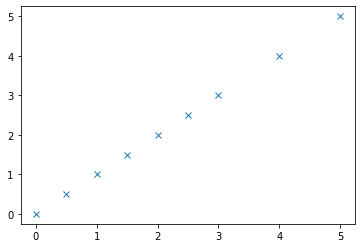

In [100]:
fig = plt.figure(1)  # An empty figure with no axes
plt.plot(x[:,1], y, 'x')

## Cost function
Also it is useful for simple test cases to not just run an optimization but first to do a systematic search. So let us first calculate the values of the cost function for different parameters theta


In [101]:
theta0 = np.arange(-2, 2.01, 0.25)
theta1 = np.arange(-2, 3.01, 0.25)
J = np.empty((len(theta0), len(theta1)))
# Calculate values of the cost function
for i in range(0, len(theta0)):  
    for j in range(0, len(theta1)):
        # HERE YOU HAVE TO ADD THE COST FUNCTION FROM THE LECTURE
        cost, loss = costFunction(x, y, [theta0[i], theta1[j]])
        J[i, j] = cost

## Visualize the cost function
Let us do some test plots to see the cost function J and to analyze how it depends on the parameters theta0 and theta1


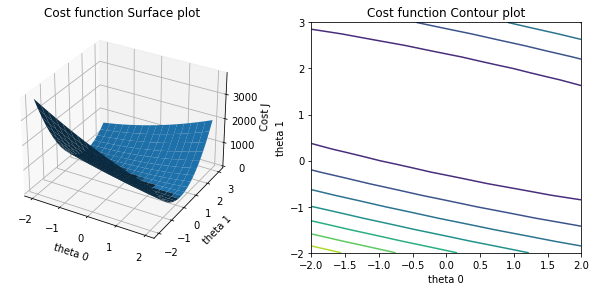

In [102]:
theta0, theta1 = np.meshgrid(theta0, theta1)
fig2 = plt.figure(2)
ax = fig2.add_subplot(121, projection="3d")
surf = ax.plot_surface(theta0, theta1, np.transpose(J))
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')
ax.set_zlabel('Cost J')
ax.set_title('Cost function Surface plot')

ax = fig2.add_subplot(122)
contour = ax.contour(theta0, theta1, np.transpose(J))
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')
ax.set_title('Cost function Contour plot')

fig2.subplots_adjust(bottom=0.1, right=1.5, top=0.9)

## Gradient descent implementation
Here we implement Gradient Descent


In [103]:
alpha = 0.05        # learning parameter
maxsteps= 1000      # number of iterations that the algorithm is running

# First estimates for our parameters
thet = [2, 0]

thet, thetaHist = gradientDescent(x, y, thet, alpha, m, maxsteps)
print(thet)

[3.985292837848215e-07, 0.9999998725702243]


## Print found optimal values



In [106]:
print("Optimized Theta0 is ", thet[0])
print("Optimized Theta1 is ", thet[1])



Optimized Theta0 is  0.09703389199108427
Optimized Theta1 is  0.9689734039687302


## Visualization of the solution
Now let's plot the found solutions of the Gradient Descent algorithms on the contour plot of our cost function to see how it approaches the desired minimum.


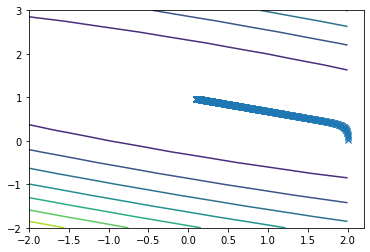

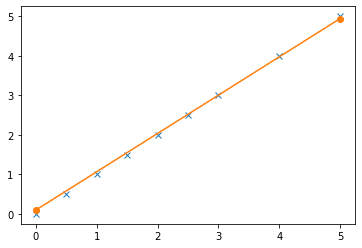

In [107]:
fig3 = plt.figure(3)
plt.contour(theta0, theta1, np.transpose(J))
plt.plot(thetaHist[:,0], thetaHist[:,1], 'x')
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')

# Finally, let's plot the hypothesis function into our data
xs = np.array([x[0,1], x[x.shape[0]-1,1]])
h = np.array([[thet[1] * xs[0] + thet[0]], [thet[1] * xs[1] + thet[0]]])
plt.figure(1)
plt.plot(x[:,1], y, 'x')  # Data
plt.plot(xs, h, '-o')     # hypothesis function
plt.show()

## Experimenting with learning rate

Optimized Theta0 is  0.09703389199108427
Optimized Theta1 is  0.9689734039687302


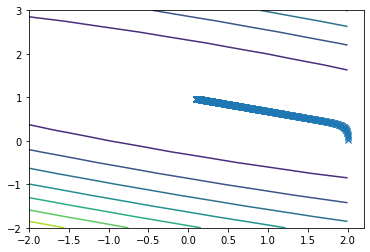

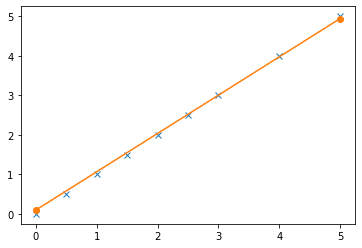

In [108]:
alpha = 0.01       # learning parameter
maxsteps= 1000      # number of iterations that the algorithm is running

# First estimates for our parameters
thet = [2, 0]

thet, thetaHist = gradientDescent(x, y, thet, alpha, m, maxsteps)
print("Optimized Theta0 is ", thet[0])
print("Optimized Theta1 is ", thet[1])

fig3 = plt.figure(3)
plt.contour(theta0, theta1, np.transpose(J))
plt.plot(thetaHist[:,0], thetaHist[:,1], 'x')
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')

# Finally, let's plot the hypothesis function into our data
xs = np.array([x[0,1], x[x.shape[0]-1,1]])
h = np.array([[thet[1] * xs[0] + thet[0]], [thet[1] * xs[1] + thet[0]]])
plt.figure(1)
plt.plot(x[:,1], y, 'x')  # Data
plt.plot(xs, h, '-o')     # hypothesis function
plt.show()

Optimized Theta0 is  1.5477960951362328
Optimized Theta1 is  0.5049453040467821


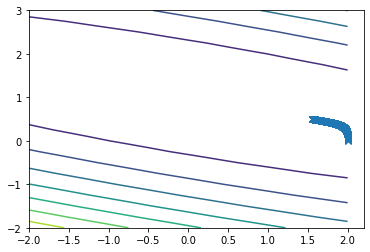

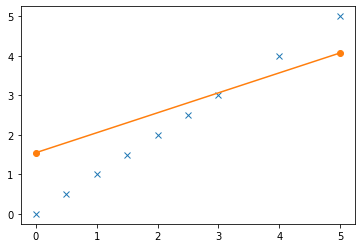

In [109]:
alpha = 0.001       # learning parameter
maxsteps= 1000      # number of iterations that the algorithm is running

# First estimates for our parameters
thet = [2, 0]

thet, thetaHist = gradientDescent(x, y, thet, alpha, m, maxsteps)
print("Optimized Theta0 is ", thet[0])
print("Optimized Theta1 is ", thet[1])

fig3 = plt.figure(3)
plt.contour(theta0, theta1, np.transpose(J))
plt.plot(thetaHist[:,0], thetaHist[:,1], 'x')
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')

# Finally, let's plot the hypothesis function into our data
xs = np.array([x[0,1], x[x.shape[0]-1,1]])
h = np.array([[thet[1] * xs[0] + thet[0]], [thet[1] * xs[1] + thet[0]]])
plt.figure(1)
plt.plot(x[:,1], y, 'x')  # Data
plt.plot(xs, h, '-o')     # hypothesis function
plt.show()

Jugding the two last set of figures, when initially we changed the learning rate from 0.05 to 0.01 the difference in performance ( the second plot) isn't very distant, maybe at the begining using 0.01 as learning rate made the obtained line slightly off but overall the performance was quasi the same. Whereas using 0.001 for the learning rate, since it took much smaller steps in the function per made iteration, the search is much more exhaustive and hence shifts lesser. Making it also impossible to test every possibilities since maxStep isnt enough, seen in the first graph that the line of X's is much shorter. And as a result the estimation function is very off from the data points, graph 2. 

Optimized Theta0 is  5.91895859464405e-14
Optimized Theta1 is  0.9999999999999811


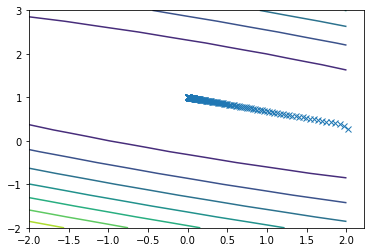

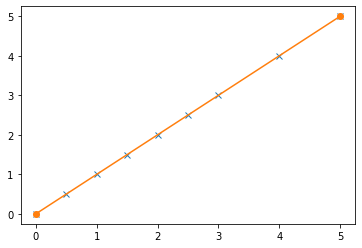

In [125]:
alpha = 0.1       # learning parameter
maxsteps= 1000      # number of iterations that the algorithm is running

# First estimates for our parameters
thet = [2, 0]

thet, thetaHist = gradientDescent(x, y, thet, alpha, m, maxsteps)
print("Optimized Theta0 is ", thet[0])
print("Optimized Theta1 is ", thet[1])

fig3 = plt.figure(3)
plt.contour(theta0, theta1, np.transpose(J))
plt.plot(thetaHist[:,0], thetaHist[:,1], 'x')
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')

# Finally, let's plot the hypothesis function into our data
xs = np.array([x[0,1], x[x.shape[0]-1,1]])
h = np.array([[thet[1] * xs[0] + thet[0]], [thet[1] * xs[1] + thet[0]]])
plt.figure(1)
plt.plot(x[:,1], y, 'x')  # Data
plt.plot(xs, h, '-o')     # hypothesis function
plt.show()

C:\Users\33789\AppData\Local\Temp/ipykernel_36712/3206137727.py:5: RuntimeWarning: overflow encountered in double_scalars
  cost = cost / 2*m
C:\Users\33789\AppData\Local\Temp/ipykernel_36712/3206137727.py:4: RuntimeWarning: overflow encountered in double_scalars
  cost = sum((np.dot(x, theta) - y)**2)
C:\Users\33789\AppData\Local\Temp/ipykernel_36712/3206137727.py:4: RuntimeWarning: overflow encountered in square
  cost = sum((np.dot(x, theta) - y)**2)
C:\Users\33789\AppData\Local\Temp/ipykernel_36712/3694070032.py:10: RuntimeWarning: overflow encountered in double_scalars
  theta[1] = theta[1] - alpha  * sum(np.multiply(loss, x[:,1])) / m


Optimized Theta0 is  nan
Optimized Theta1 is  nan


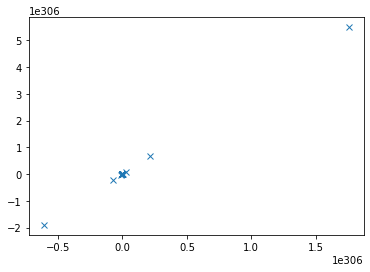

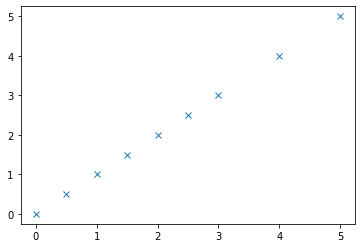

In [123]:
alpha = 0.5# learning parameter
maxsteps= 1000      # number of iterations that the algorithm is running

# First estimates for our parameters
thet = [2, 0]

thet, thetaHist = gradientDescent(x, y, thet, alpha, m, maxsteps)
print("Optimized Theta0 is ", thet[0])
print("Optimized Theta1 is ", thet[1])

fig3 = plt.figure(3)
plt.contour(theta0, theta1, np.transpose(J))
plt.plot(thetaHist[:,0], thetaHist[:,1], 'x')
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')

# Finally, let's plot the hypothesis function into our data
xs = np.array([x[0,1], x[x.shape[0]-1,1]])
h = np.array([[thet[1] * xs[0] + thet[0]], [thet[1] * xs[1] + thet[0]]])
plt.figure(1)
plt.plot(x[:,1], y, 'x')  # Data
plt.plot(xs, h, '-o')     # hypothesis function
plt.show()

Optimized Theta0 is  -6.26127257034506e+123
Optimized Theta1 is  -1.9581769321561477e+124


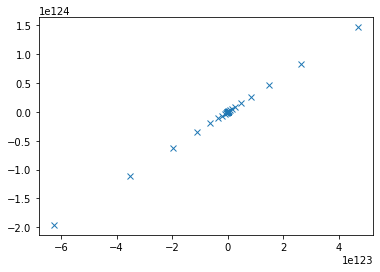

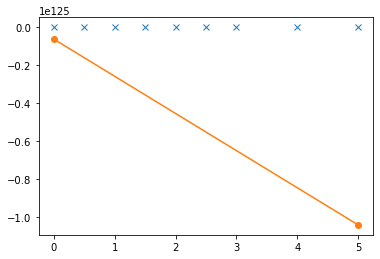

In [124]:
alpha = 0.3       # learning parameter
maxsteps= 1000      # number of iterations that the algorithm is running

# First estimates for our parameters
thet = [2, 0]

thet, thetaHist = gradientDescent(x, y, thet, alpha, m, maxsteps)
print("Optimized Theta0 is ", thet[0])
print("Optimized Theta1 is ", thet[1])

fig3 = plt.figure(3)
plt.contour(theta0, theta1, np.transpose(J))
plt.plot(thetaHist[:,0], thetaHist[:,1], 'x')
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')

# Finally, let's plot the hypothesis function into our data
xs = np.array([x[0,1], x[x.shape[0]-1,1]])
h = np.array([[thet[1] * xs[0] + thet[0]], [thet[1] * xs[1] + thet[0]]])
plt.figure(1)
plt.plot(x[:,1], y, 'x')  # Data
plt.plot(xs, h, '-o')     # hypothesis function
plt.show()

Trying with bigger alphas, we had already a overflow error using 0.5 as value for alpha. The latest graph is when alpha =  0.3, the range of the of the graphs are completely different compared when alpha was = 0.1, speaking of which it had a "perfect" performance fitting the data points. With 0.3 the data points and the estimated are very far apart, showing an autrious performance. 

# 3

Well, I am not very sure, because it depends on the function we are explorating. The function should be convex in order to find a global minima, and I am not to sure with 3 dimensions since there could be many many minima, and thus it becomes the task to get the absolute minima of the entire graph. If when reaching the global minima we fit perfect the data points (this is my understanding, please do correct me if im wrong) , then it is little exercise we reached the minima with an alpha of 0.1 just before. 

# 4

Optimized Theta0 is  5.91895859464405e-14
Optimized Theta1 is  0.9999999999999811


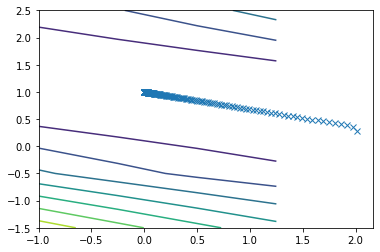

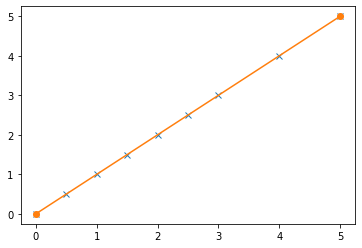

In [132]:
#theta0 = np.arange(-2, 2.01, 0.25)
#theta1 = np.arange(-2, 3.01, 0.25)

theta0= np.arange(-1, 2, 0.75)
theta1 = np.arange(-1.5, 3, 1)
J = np.empty((len(theta0), len(theta1)))
# Calculate values of the cost function
for i in range(0, len(theta0)):  
    for j in range(0, len(theta1)):
        # HERE YOU HAVE TO ADD THE COST FUNCTION FROM THE LECTURE
        cost, loss = costFunction(x, y, [theta0[i], theta1[j]])
        J[i, j] = cost
        
        
alpha = 0.1       # learning parameter
maxsteps= 1000      # number of iterations that the algorithm is running

# First estimates for our parameters
thet = [2, 0]

thet, thetaHist = gradientDescent(x, y, thet, alpha, m, maxsteps)
print("Optimized Theta0 is ", thet[0])
print("Optimized Theta1 is ", thet[1])

fig3 = plt.figure(3)
plt.contour(theta0, theta1, np.transpose(J))
plt.plot(thetaHist[:,0], thetaHist[:,1], 'x')
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')

# Finally, let's plot the hypothesis function into our data
xs = np.array([x[0,1], x[x.shape[0]-1,1]])
h = np.array([[thet[1] * xs[0] + thet[0]], [thet[1] * xs[1] + thet[0]]])
plt.figure(1)
plt.plot(x[:,1], y, 'x')  # Data
plt.plot(xs, h, '-o')     # hypothesis function
plt.show()

I first tested with a only positive range but I got errors for the plotting, but only changing a bit of the thetas tested got us a different interval in the y-axis of the first graph, moveover it converges to 1.0 instead to 0.0 like it did with the previous set of thetas. This happens whether alpha is set to 0.1 (perfect performance from previous experiment) and 0.01 t hat performed good too. Another differences are the "isolines" (I dont really understand what they represent) that terminate at a point. 

Optimized Theta0 is  0.09703389199108427
Optimized Theta1 is  0.9689734039687302


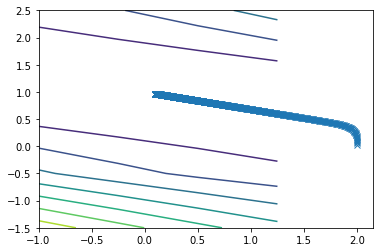

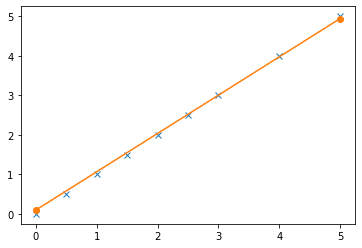

In [133]:
alpha = 0.01      # learning parameter
maxsteps= 1000      # number of iterations that the algorithm is running

# First estimates for our parameters
thet = [2, 0]

thet, thetaHist = gradientDescent(x, y, thet, alpha, m, maxsteps)
print("Optimized Theta0 is ", thet[0])
print("Optimized Theta1 is ", thet[1])

fig3 = plt.figure(3)
plt.contour(theta0, theta1, np.transpose(J))
plt.plot(thetaHist[:,0], thetaHist[:,1], 'x')
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')

# Finally, let's plot the hypothesis function into our data
xs = np.array([x[0,1], x[x.shape[0]-1,1]])
h = np.array([[thet[1] * xs[0] + thet[0]], [thet[1] * xs[1] + thet[0]]])
plt.figure(1)
plt.plot(x[:,1], y, 'x')  # Data
plt.plot(xs, h, '-o')     # hypothesis function
plt.show()

# 5
The problem generated by not updating simultaneously the thetas is that if theta1 is calculated with theta0, you will use this new theta0 to then computed theta1, but this is not the gradient descent method. 
By using two different for loops for each update you computate theta1 with the new value of theta0 and thus obtained a different result

# 6

steps:
1000
Optimized Theta0 is  5.91895859464405e-14
Optimized Theta1 is  0.9999999999999811


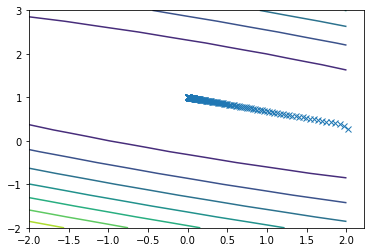

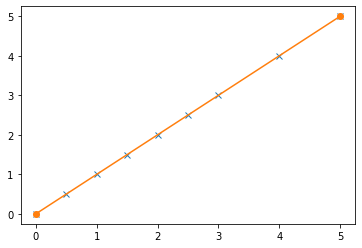

In [138]:
theta0 = np.arange(-2, 2.01, 0.25)
theta1 = np.arange(-2, 3.01, 0.25)

#theta0= np.arange(-1, 2, 0.75)
#theta1 = np.arange(-1.5, 3, 1)
J = np.empty((len(theta0), len(theta1)))
# Calculate values of the cost function
for i in range(0, len(theta0)):  
    for j in range(0, len(theta1)):
        # HERE YOU HAVE TO ADD THE COST FUNCTION FROM THE LECTURE
        cost, loss = costFunction(x, y, [theta0[i], theta1[j]])
        J[i, j] = cost
        
        
alpha = 0.1       # learning parameter
maxsteps= 1000      # number of iterations that the algorithm is running

# First estimates for our parameters
thet = [2, 0]

thet, thetaHist = gradientDescent(x, y, thet, alpha, m, maxsteps)
print("Optimized Theta0 is ", thet[0])
print("Optimized Theta1 is ", thet[1])

fig3 = plt.figure(3)
plt.contour(theta0, theta1, np.transpose(J))
plt.plot(thetaHist[:,0], thetaHist[:,1], 'x')
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')

# Finally, let's plot the hypothesis function into our data
xs = np.array([x[0,1], x[x.shape[0]-1,1]])
h = np.array([[thet[1] * xs[0] + thet[0]], [thet[1] * xs[1] + thet[0]]])
plt.figure(1)
plt.plot(x[:,1], y, 'x')  # Data
plt.plot(xs, h, '-o')     # hypothesis function
plt.show()

steps:
1000
Optimized Theta0 is  5.91895859464405e-14
Optimized Theta1 is  0.9999999999999811


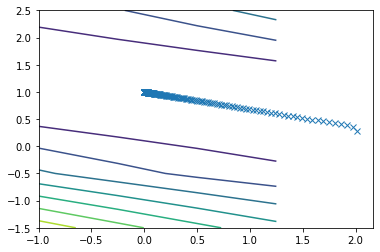

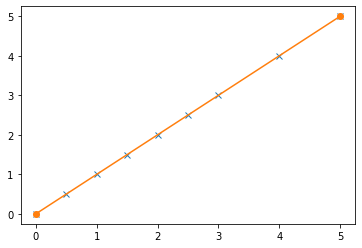

In [139]:
#theta0 = np.arange(-2, 2.01, 0.25)
#theta1 = np.arange(-2, 3.01, 0.25)

theta0= np.arange(-1, 2, 0.75)
theta1 = np.arange(-1.5, 3, 1)
J = np.empty((len(theta0), len(theta1)))
# Calculate values of the cost function
for i in range(0, len(theta0)):  
    for j in range(0, len(theta1)):
        # HERE YOU HAVE TO ADD THE COST FUNCTION FROM THE LECTURE
        cost, loss = costFunction(x, y, [theta0[i], theta1[j]])
        J[i, j] = cost
        
        
alpha = 0.1       # learning parameter
maxsteps= 1000      # number of iterations that the algorithm is running

# First estimates for our parameters
thet = [2, 0]

thet, thetaHist = gradientDescent(x, y, thet, alpha, m, maxsteps)
print("Optimized Theta0 is ", thet[0])
print("Optimized Theta1 is ", thet[1])

fig3 = plt.figure(3)
plt.contour(theta0, theta1, np.transpose(J))
plt.plot(thetaHist[:,0], thetaHist[:,1], 'x')
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')

# Finally, let's plot the hypothesis function into our data
xs = np.array([x[0,1], x[x.shape[0]-1,1]])
h = np.array([[thet[1] * xs[0] + thet[0]], [thet[1] * xs[1] + thet[0]]])
plt.figure(1)
plt.plot(x[:,1], y, 'x')  # Data
plt.plot(xs, h, '-o')     # hypothesis function
plt.show()

Both have done all possible moves for what we have considered as teh "exact values" thetas. This could indicate that the results are thus not optimal

steps:
1000000
Optimized Theta0 is  3.3177829834790493e-16
Optimized Theta1 is  0.9999999999999999


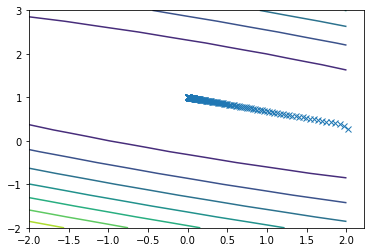

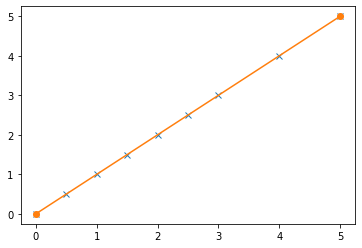

In [140]:
theta0 = np.arange(-2, 2.01, 0.25)
theta1 = np.arange(-2, 3.01, 0.25)

#theta0= np.arange(-1, 2, 0.75)
#theta1 = np.arange(-1.5, 3, 1)
J = np.empty((len(theta0), len(theta1)))
# Calculate values of the cost function
for i in range(0, len(theta0)):  
    for j in range(0, len(theta1)):
        # HERE YOU HAVE TO ADD THE COST FUNCTION FROM THE LECTURE
        cost, loss = costFunction(x, y, [theta0[i], theta1[j]])
        J[i, j] = cost
        
        
alpha = 0.1       # learning parameter
maxsteps= 1000000      # number of iterations that the algorithm is running

# First estimates for our parameters
thet = [2, 0]

thet, thetaHist = gradientDescent(x, y, thet, alpha, m, maxsteps)
print("Optimized Theta0 is ", thet[0])
print("Optimized Theta1 is ", thet[1])

fig3 = plt.figure(3)
plt.contour(theta0, theta1, np.transpose(J))
plt.plot(thetaHist[:,0], thetaHist[:,1], 'x')
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')

# Finally, let's plot the hypothesis function into our data
xs = np.array([x[0,1], x[x.shape[0]-1,1]])
h = np.array([[thet[1] * xs[0] + thet[0]], [thet[1] * xs[1] + thet[0]]])
plt.figure(1)
plt.plot(x[:,1], y, 'x')  # Data
plt.plot(xs, h, '-o')     # hypothesis function
plt.show()

We increased the number of possible iterations and still performed all of them. 
So we can deduced that it still didn't find the optimal values of theta.

Correction!! 
The for loop doesn't have any stopping condition thus even if it finds the optimal value it doesn't stop doing the next iteration

steps:
1000
Optimized Theta0 is  5.91895859464405e-14
Optimized Theta1 is  0.9999999999999811


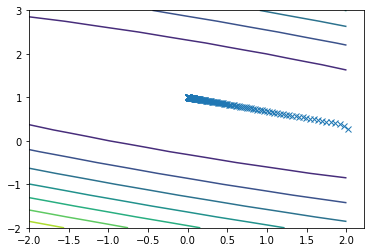

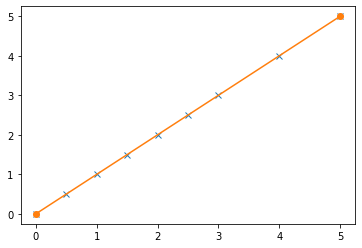

In [143]:
theta0 = np.arange(-2, 2.01, 0.25)
theta1 = np.arange(-2, 3.01, 0.25)

#theta0= np.arange(-1, 2, 0.75)
#theta1 = np.arange(-1.5, 3, 1)
J = np.empty((len(theta0), len(theta1)))
# Calculate values of the cost function
for i in range(0, len(theta0)):  
    for j in range(0, len(theta1)):
        # HERE YOU HAVE TO ADD THE COST FUNCTION FROM THE LECTURE
        cost, loss = costFunction(x, y, [theta0[i], theta1[j]])
        J[i, j] = cost
        
        
alpha = 0.1       # learning parameter
maxsteps= 1000      # number of iterations that the algorithm is running

# First estimates for our parameters
thet = [2, 0]

thet, thetaHist = gradientDescent(x, y, thet, alpha, m, maxsteps)
print("Optimized Theta0 is ", thet[0])
print("Optimized Theta1 is ", thet[1])

fig3 = plt.figure(3)
plt.contour(theta0, theta1, np.transpose(J))
plt.plot(thetaHist[:,0], thetaHist[:,1], 'x')
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')

# Finally, let's plot the hypothesis function into our data
xs = np.array([x[0,1], x[x.shape[0]-1,1]])
h = np.array([[thet[1] * xs[0] + thet[0]], [thet[1] * xs[1] + thet[0]]])
plt.figure(1)
plt.plot(x[:,1], y, 'x')  # Data
plt.plot(xs, h, '-o')     # hypothesis function
plt.show()

We then added a flag in the for loop for equality of two consecutive values of theta0, and no sentence got printed and thus we can conclude that the optimal value for theta was never achieved since it always was differing from the previous. 

Optimized Theta0 is  3.3177829834790493e-16
Optimized Theta1 is  0.9999999999999999


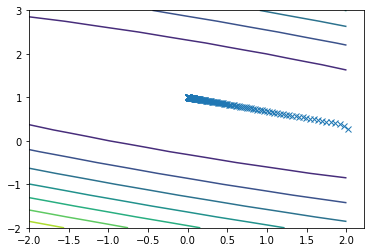

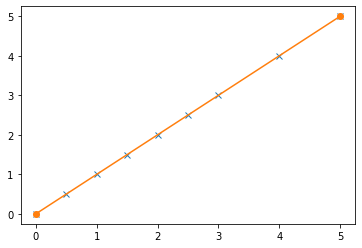

In [146]:
theta0 = np.arange(-2, 2.01, 0.25)
theta1 = np.arange(-2, 3.01, 0.25)

#theta0= np.arange(-1, 2, 0.75)
#theta1 = np.arange(-1.5, 3, 1)
J = np.empty((len(theta0), len(theta1)))
# Calculate values of the cost function
for i in range(0, len(theta0)):  
    for j in range(0, len(theta1)):
        # HERE YOU HAVE TO ADD THE COST FUNCTION FROM THE LECTURE
        cost, loss = costFunction(x, y, [theta0[i], theta1[j]])
        J[i, j] = cost
        
        
alpha = 0.1       # learning parameter
maxsteps= 1000000      # number of iterations that the algorithm is running

# First estimates for our parameters
thet = [2, 0]

thet, thetaHist = gradientDescent(x, y, thet, alpha, m, maxsteps)
print("Optimized Theta0 is ", thet[0])
print("Optimized Theta1 is ", thet[1])

fig3 = plt.figure(3)
plt.contour(theta0, theta1, np.transpose(J))
plt.plot(thetaHist[:,0], thetaHist[:,1], 'x')
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')

# Finally, let's plot the hypothesis function into our data
xs = np.array([x[0,1], x[x.shape[0]-1,1]])
h = np.array([[thet[1] * xs[0] + thet[0]], [thet[1] * xs[1] + thet[0]]])
plt.figure(1)
plt.plot(x[:,1], y, 'x')  # Data
plt.plot(xs, h, '-o')     # hypothesis function
plt.show()